In [1]:
# import the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# load the dataset 
df = pd.read_csv('Desktop/police.csv/police.csv')

In [3]:
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
# check for null values 
df.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
# drop county_name and state 
df.drop(['state', 'county_name'], axis = 'columns', inplace = True)

### Changing the data types for the necessary columns

In [6]:
# Check the datatypes 
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [7]:
# change some of the columns to workable datatypes 
df['driver_gender'] = df['driver_gender'].astype('category')
df['driver_race'] = df['driver_race'].astype('category') 
df['is_arrested'] = df['is_arrested'].astype('bool') 
df['district'] = df['district'].astype('category')

In [8]:
df.dtypes

stop_date               object
stop_time               object
driver_gender         category
driver_race           category
violation_raw           object
violation               object
search_conducted          bool
search_type             object
stop_outcome            object
is_arrested               bool
stop_duration           object
drugs_related_stop        bool
district              category
dtype: object

In [9]:
# concatenate stop_date and stop_time 
df['stop_datetime'] = df.stop_date.str.cat(df.stop_time, sep =' ') 

In [10]:
# change stop_datetime to datetime datatype 
df['stop_datetime'] = pd.to_datetime(df['stop_datetime'])

In [11]:
df.dtypes

stop_date                     object
stop_time                     object
driver_gender               category
driver_race                 category
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                    category
stop_datetime         datetime64[ns]
dtype: object

In [12]:
# set stop_datetime as index 
df.set_index('stop_datetime', inplace = True)

In [13]:
df.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [14]:
# drop the redundant stop_date and stop_time columns 
df.drop(['stop_date', 'stop_time'], axis = 'columns', inplace = True)

In [15]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Data Cleaning

In [16]:
df.isnull().sum()

driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested               0
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [17]:
# drop the null values row-wise with the driver_gender column
df.dropna(subset = ['driver_gender'], inplace = True)

In [18]:
df.isnull().sum()

driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

## Exploratory Data Analysis

In [19]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [20]:
df.shape

(86536, 11)

### Driver Gender

In [21]:
# No of Male and Female drivers
df.driver_gender.value_counts(normalize = True)

M    0.72527
F    0.27473
Name: driver_gender, dtype: float64

#### 73% of the drivers are Male

In [22]:
df.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [23]:
df.violation_raw.value_counts()

Speeding                            48423
Other Traffic Violation             16224
Equipment/Inspection Violation      10921
Registration Violation               3703
Seatbelt Violation                   2856
Special Detail/Directed Patrol       2467
Call for Service                     1391
Motorist Assist/Courtesy              205
Violation of City/Town Ordinance      181
APB                                    91
Suspicious Person                      56
Warrant                                18
Name: violation_raw, dtype: int64

In [24]:
Male = df[df.driver_gender == 'M'] 
Female = df[df.driver_gender == 'F'] 

In [25]:
print('Male:')
Male.violation.value_counts(normalize = True)

Male:


Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

In [26]:
print('Female:')
Female.violation.value_counts(normalize = True)

Female:


Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

### Females are more prone to speeding violation than Males 
### Speeding violation is the commonest in both Male and Female drivers

In [27]:
# suspicuious person finally arrested
suspicious_arrested = df[(df.violation_raw == 'Suspicious Person') & (df.is_arrested == 1)] 
suspicious_arrested

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2006-03-31 07:30:00,M,White,Suspicious Person,Other,True,"Incident to Arrest,Protective Frisk",Arrest Driver,True,16-30 Min,False,Zone K2
2007-02-15 04:27:00,M,White,Suspicious Person,Other,True,Incident to Arrest,Arrest Passenger,True,16-30 Min,False,Zone X4
2007-04-24 17:29:00,F,Black,Suspicious Person,Other,True,"Incident to Arrest,Inventory",Arrest Driver,True,30+ Min,False,Zone X4
2007-10-12 13:00:00,M,White,Suspicious Person,Other,True,Probable Cause,Arrest Driver,True,30+ Min,True,Zone X4
2009-11-01 12:42:00,M,White,Suspicious Person,Other,True,Protective Frisk,Arrest Driver,True,30+ Min,True,Zone K2
2010-02-26 02:38:00,M,Black,Suspicious Person,Other,False,NaN,Arrest Driver,True,0-15 Min,False,Zone X4
2010-04-13 23:41:00,M,White,Suspicious Person,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone K1
2011-07-15 23:53:00,M,White,Suspicious Person,Other,False,NaN,Arrest Driver,True,0-15 Min,False,Zone K2
2013-11-13 02:24:00,M,Hispanic,Suspicious Person,Other,False,NaN,Arrest Driver,True,0-15 Min,False,Zone X4


### 9 out of the 56 person stopped for suspicion were finally arrested

In [96]:
arrested = df[df['is_arrested'] == True]
arrested.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,drugs_related_stop,district,stopDuration
stop_datetime,,,,,,,,,,,
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,False,Zone X1,22
2005-09-11 00:10:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,False,Zone X4,45
2005-10-02 09:30:00,M,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,False,Zone K1,45
2005-10-02 17:13:00,M,White,Registration Violation,Registration/plates,False,NaN,Arrest Driver,True,False,Zone X4,45
2005-10-03 01:13:00,M,White,Speeding,Speeding,False,NaN,Arrest Driver,True,False,Zone X4,45


In [105]:
violation4Arrest = arrested.groupby('violation_raw')['is_arrested'].count().sort_values(ascending = False)
violation4Arrest

violation_raw
Other Traffic Violation             940
Equipment/Inspection Violation      709
Speeding                            663
Registration Violation              340
Call for Service                    250
Seatbelt Violation                   75
Special Detail/Directed Patrol       26
APB                                  22
Motorist Assist/Courtesy             21
Violation of City/Town Ordinance     12
Warrant                              11
Suspicious Person                     9
Name: is_arrested, dtype: int64

<AxesSubplot:xlabel='violation_raw'>

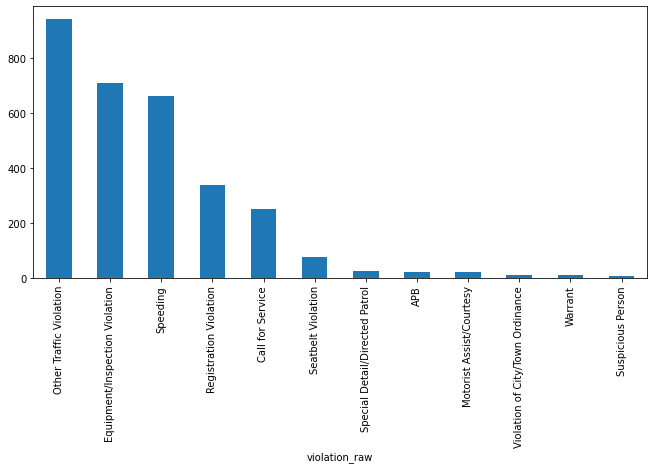

In [109]:
plt.figure(figsize = (11, 5))
violation4Arrest.plot(kind='bar')

### Equipment/Inspection violation, speeding are top reaseons while driver stopped can get arrested.

## District

In [28]:
# proportion of police stoppage by district
df.district.value_counts(normalize = True)

Zone X4    0.260042
Zone K3    0.226033
Zone K2    0.204100
Zone X3    0.186905
Zone K1    0.095868
Zone X1    0.027052
Name: district, dtype: float64

In [29]:
speeding = df[df.violation == 'Speeding']

In [30]:
speeding.district.value_counts()

Zone K3    12322
Zone K2    10448
Zone X4     9795
Zone X3     8779
Zone K1     5960
Zone X1     1119
Name: district, dtype: int64

<AxesSubplot:>

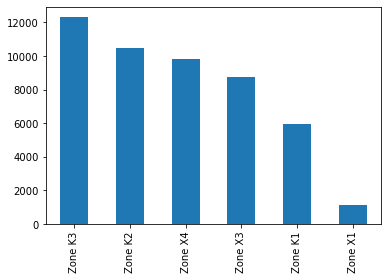

In [31]:
speeding.district.value_counts().plot(kind = 'bar')

### Zone K3 and K2 have the highest speeding related stoppage

In [32]:
# Groupby count on violation and district variables.
df.groupby(['violation', 'district']).size().unstack()

district,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
violation,,,,,,
Equipment,672,2061,2302,296,2049,3541
Moving violation,1254,2962,2898,671,3086,5353
Other,290,942,705,143,769,1560
Registration/plates,120,768,695,38,671,1411
Seat belt,0,481,638,74,820,843
Speeding,5960,10448,12322,1119,8779,9795


<AxesSubplot:xlabel='district', ylabel='count'>

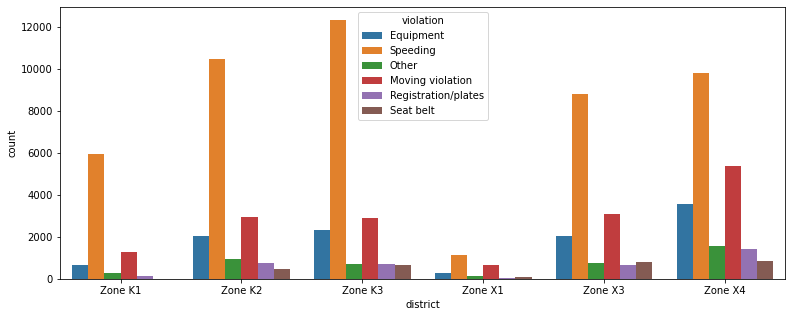

In [90]:
plt.figure(figsize = (13, 5))
sns.countplot(data = df, hue = 'violation',x= 'district')

### Speeding violation has the highest stoppage for all district zones

In [33]:
# crosstab of violation and district 
pd.crosstab(df.violation, df.district)

district,Zone K1,Zone K2,Zone K3,Zone X1,Zone X3,Zone X4
violation,,,,,,
Equipment,672,2061,2302,296,2049,3541
Moving violation,1254,2962,2898,671,3086,5353
Other,290,942,705,143,769,1560
Registration/plates,120,768,695,38,671,1411
Seat belt,0,481,638,74,820,843
Speeding,5960,10448,12322,1119,8779,9795


In [34]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [35]:
# district associated with more drug related stop 
district_drug = df.groupby('district').drugs_related_stop.sum() 
district_drug

district
Zone K1     77
Zone K2    118
Zone K3    253
Zone X1      5
Zone X3     82
Zone X4    327
Name: drugs_related_stop, dtype: int64

<AxesSubplot:ylabel='district'>

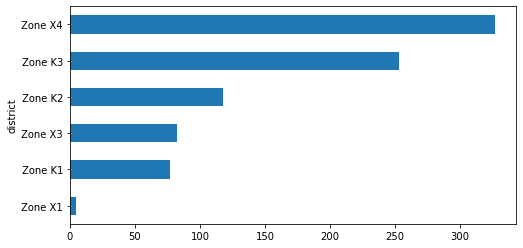

In [36]:
plt.figure(figsize = (8, 4))
district_drug.sort_values().plot(kind = 'barh')

### District Zone X4 has the highest drug related stop

## Driver's race

In [37]:
# Racial check of police stoppage 
df.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [38]:
# Racial influence in search conducted 
race_search = df.groupby('driver_race').search_conducted.sum()
race_search

driver_race
Asian         49
Black        823
Hispanic     598
Other          3
White       1834
Name: search_conducted, dtype: int64

<AxesSubplot:xlabel='driver_race'>

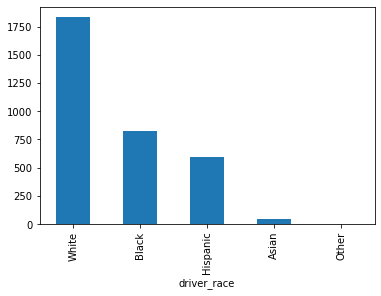

In [39]:
race_search.sort_values(ascending = False).plot(kind ='bar')

### The White and the Blacks have the highest search conducted cases during police stoppage

In [40]:
# relationship between search_type and driver's race
pd.crosstab(df.search_type, df.driver_race).head()

driver_race,Asian,Black,Hispanic,Other,White
search_type,,,,,
Incident to Arrest,21,336,253,0,680
"Incident to Arrest,Inventory",5,31,33,0,54
"Incident to Arrest,Inventory,Probable Cause",0,5,6,0,24
"Incident to Arrest,Inventory,Protective Frisk",0,3,3,0,12
"Incident to Arrest,Inventory,Reasonable Suspicion",0,1,0,0,3


### Incident to arrest is the highest search type across the different driver race

In [41]:
# relationship between the driver race and drug related stoppage 
race_drug_search = df.groupby('driver_race').drugs_related_stop.sum().sort_values(ascending = False)
race_drug_search

driver_race
White       496
Black       221
Hispanic    131
Asian        13
Other         1
Name: drugs_related_stop, dtype: int64

<AxesSubplot:xlabel='driver_race'>

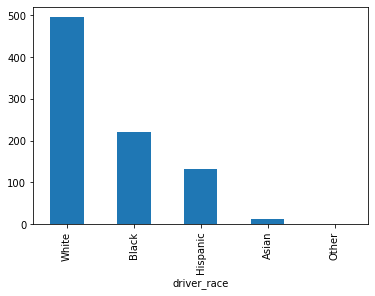

In [42]:
race_drug_search.plot(kind = 'bar')

### The White and the Black have the highest drug related searches

In [43]:
pd.crosstab(df.driver_race, df.is_arrested, normalize  = 'index')

is_arrested,False,True
driver_race,,
Asian,0.980745,0.019255
Black,0.937403,0.062597
Hispanic,0.937802,0.062198
Other,0.992453,0.007547
White,0.973234,0.026766


### About 6% of Blacks and Hispanics stopped by police were arrested. The highest across the driver race

In [116]:
pd.crosstab(df.driver_race, df.drugs_related_stop, normalize = 'index')

drugs_related_stop,False,True
driver_race,,
Asian,0.994558,0.005442
Black,0.982011,0.017989
Hispanic,0.986532,0.013468
Other,0.996226,0.003774
White,0.991983,0.008017


### About 2% of the blacks and Hispanics stopped were for drug related issues. The highest across the driver races

In [45]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# Stop date and time

In [46]:
is_arrested_hour = df.groupby(df.index.hour).is_arrested.sum()
is_arrested_hour

stop_datetime
0     248
1     262
2     163
3      64
4      12
5       8
6      43
7      57
8     108
9     162
10    200
11    165
12    130
13    140
14    163
15    146
16    125
17    105
18     80
19     79
20    120
21     85
22    166
23    247
Name: is_arrested, dtype: int64

<AxesSubplot:xlabel='stop_datetime'>

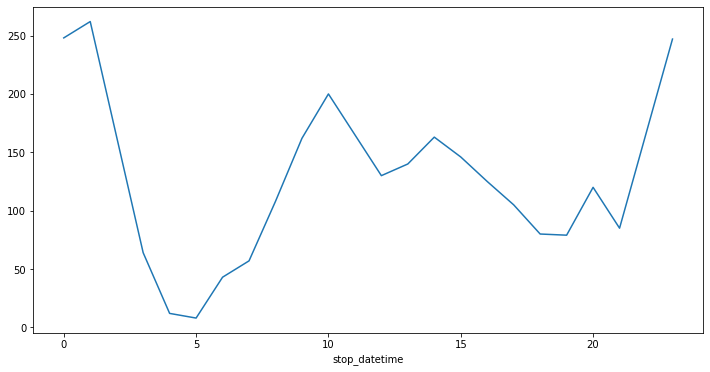

In [47]:
plt.figure(figsize = (12, 6))
is_arrested_hour.plot()

### The arrest begins to decline at 1 a.m. midnight and rose again by 6 a.m. in the morning

In [48]:
is_arrested_month = df.groupby(df.index.month).is_arrested.sum()
is_arrested_month

stop_datetime
1     304
2     233
3     270
4     236
5     268
6     219
7     274
8     262
9     220
10    265
11    251
12    276
Name: is_arrested, dtype: int64

<AxesSubplot:title={'center':'Monthly Arrest'}, xlabel='Month of Arrest', ylabel='Frequency'>

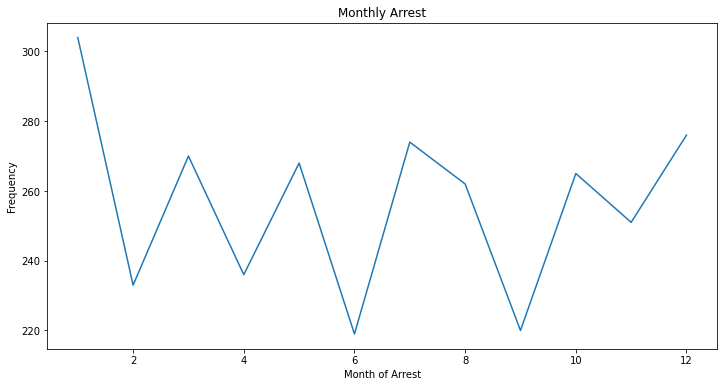

In [117]:
plt.figure(figsize = (12, 6))
is_arrested_month.plot(title = 'Monthly Arrest', xlabel = 'Month of Arrest', ylabel = 'Frequency')

### More arrest are made in January compared to the rest month. June and September have the lowest number of arrest

In [50]:
is_arrested_year = df.groupby(df.index.year).is_arrested.sum()
is_arrested_year

stop_datetime
2005    161
2006    459
2007    302
2008    239
2009    281
2010    278
2011    283
2012    348
2013    225
2014    253
2015    249
Name: is_arrested, dtype: int64

<AxesSubplot:title={'center':'Yearly Arrest'}, xlabel='Year of Arrest', ylabel='Frequency'>

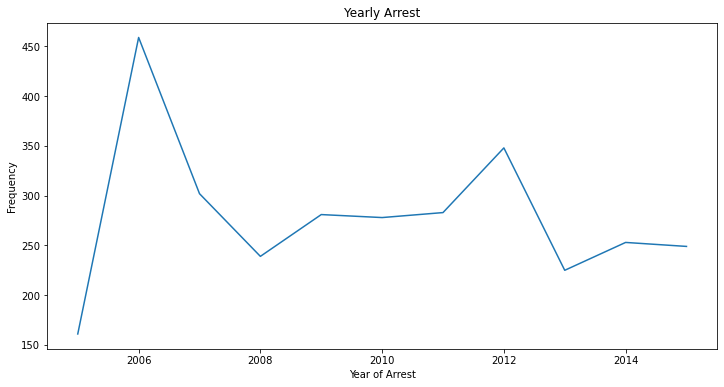

In [118]:
plt.figure(figsize = (12, 6))
is_arrested_year.plot(title = 'Yearly Arrest', xlabel = 'Year of Arrest', ylabel = 'Frequency')

### Police arrest have reduced over the years since it peak at 2006

In [52]:
drug_stop_hour = df.groupby(df.index.hour).drugs_related_stop.sum()
drug_stop_hour

stop_datetime
0     100
1      79
2      52
3      21
4       5
5       2
6       6
7      12
8      21
9      36
10     58
11     45
12     19
13     40
14     45
15     36
16     24
17     26
18     21
19     18
20     38
21     17
22     60
23     81
Name: drugs_related_stop, dtype: int64

<AxesSubplot:title={'center':'Drug stop Hour'}, xlabel='Hour', ylabel='Frequency'>

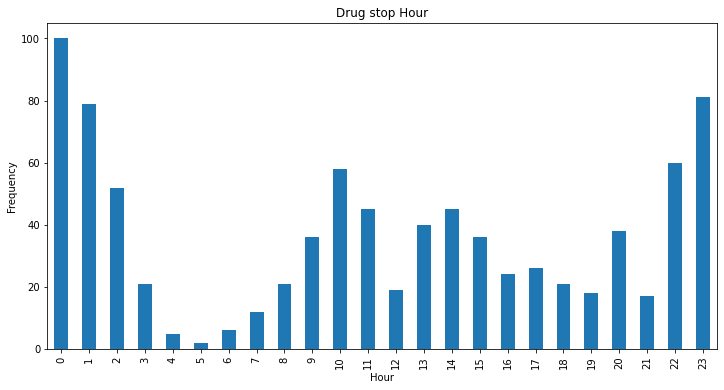

In [120]:
plt.figure(figsize = (12, 6))
drug_stop_hour.plot(kind = 'bar', title = 'Drug stop Hour', xlabel = 'Hour', ylabel = 'Frequency')

### Drug related stop occur mostly in evening through early morning

In [121]:
drug_stop_day = df.groupby(df.index.day).drugs_related_stop.sum()
drug_stop_day

stop_datetime
1     30
2     35
3     30
4     34
5     30
6     28
7     40
8     22
9     29
10    23
11    30
12    24
13    33
14    32
15    26
16    27
17    22
18    20
19    26
20    27
21    31
22    24
23    31
24    21
25    33
26    28
27    31
28    21
29    27
30    31
31    16
Name: drugs_related_stop, dtype: int64

<AxesSubplot:title={'center':'Drug stop Hour'}, xlabel='Hour', ylabel='Frequency'>

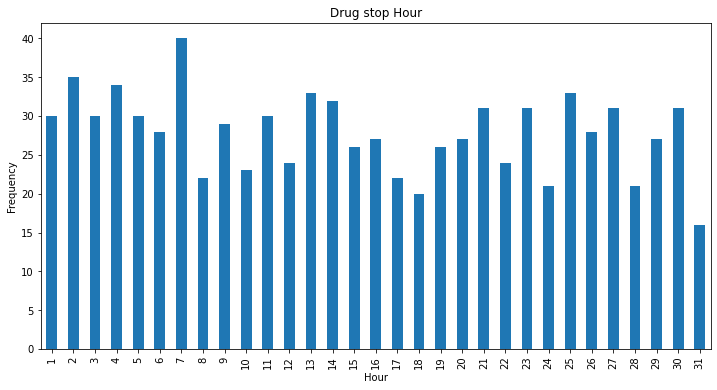

In [126]:
plt.figure(figsize = (12, 6))
drug_stop_day.plot(kind = 'bar', title = 'Drug stop Hour', xlabel = 'Hour', ylabel = 'Frequency')

In [54]:
drug_stop_month = df.groupby(df.index.month).drugs_related_stop.sum()
drug_stop_month

stop_datetime
1      78
2      56
3      79
4      77
5      79
6      72
7     100
8      68
9      64
10     74
11     54
12     61
Name: drugs_related_stop, dtype: int64

<AxesSubplot:xlabel='stop_datetime'>

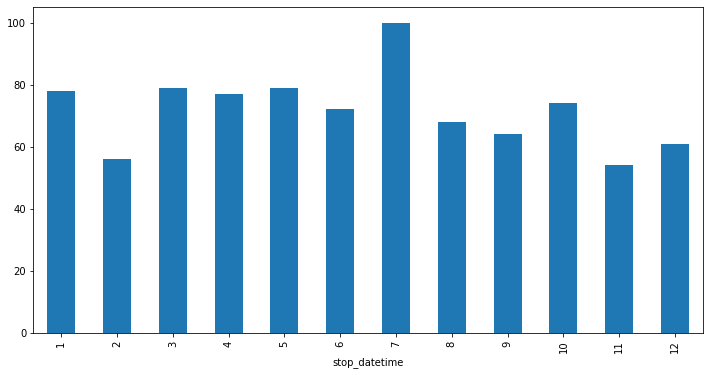

In [127]:
plt.figure(figsize = (12, 6))
drug_stop_month.plot(kind = 'bar')

### August have the highest number of drug related stop

In [56]:
drug_stop_year = df.groupby(df.index.year).drugs_related_stop.sum()
drug_stop_year

stop_datetime
2005     16
2006     73
2007     72
2008     62
2009     71
2010     72
2011     75
2012    103
2013     99
2014    120
2015     99
Name: drugs_related_stop, dtype: int64

<AxesSubplot:xlabel='stop_datetime'>

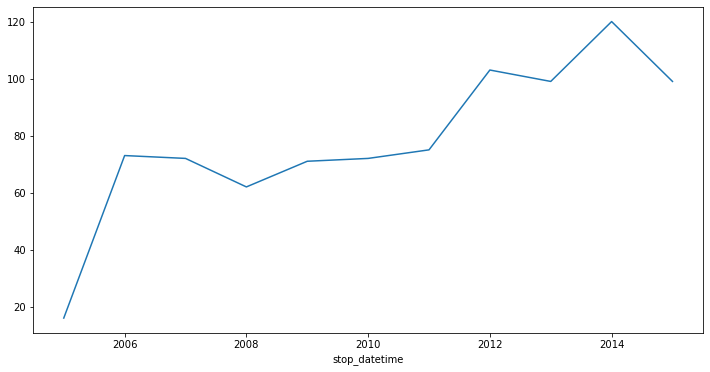

In [57]:
plt.figure(figsize = (12, 6))
drug_stop_year.plot()

### Drug related stop have increased over the years

In [58]:
# search conducted proportion 
df.search_conducted.value_counts(normalize = True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

### Search are conducted on about 4% of the people stopped

In [59]:
pd.crosstab(df.search_conducted, df.is_arrested, normalize = 'index')

is_arrested,False,True
search_conducted,,
False,0.976703,0.023297
True,0.655579,0.344421


### 34% of the people searched were later arrested. 2.3% of people not searched were arrested. The chances of getting arrested if not search is low

In [60]:
pd.crosstab(df.search_conducted, df.drugs_related_stop, normalize = 'index')

drugs_related_stop,False,True
search_conducted,,
False,1.000000,0.000000
True,0.739341,0.260659


### 26% of the search conducted are drug related

In [61]:
pd.crosstab(df.is_arrested, df.drugs_related_stop, normalize = 'index')

drugs_related_stop,False,True
is_arrested,,
False,0.992463,0.007537
True,0.924301,0.075699


### 7% of the arrest made were drug related

In [62]:
data = df.copy

In [63]:
# an average of the stop duration
mapping = {'0-15 Min':8, '16-30 Min': 22, '30+ Min': 45}

In [64]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [65]:
df['stopDuration'] = df['stop_duration'].map(mapping)

In [66]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stopDuration
stop_datetime,,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,8
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,8
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,8
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,22
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,8


In [67]:
# stop duration counts
pre_stopD = df['stopDuration'].value_counts().sort_values(ascending = True)
pre_stopD

45     3219
22    13740
8     69577
Name: stopDuration, dtype: int64

<AxesSubplot:>

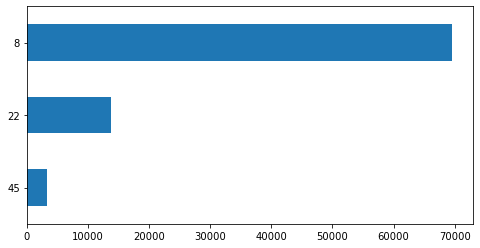

In [68]:
plt.figure(figsize = (8, 4))
pre_stopD.plot(kind = 'barh')

### The prevalent stop duration is 0 - 15 Mins

In [69]:
# stop duration and getting arrested
arrest_stopD = df.groupby('stopDuration').is_arrested.sum() 
arrest_stopD

stopDuration
8      950
22    1286
45     842
Name: is_arrested, dtype: int64

<AxesSubplot:xlabel='stopDuration'>

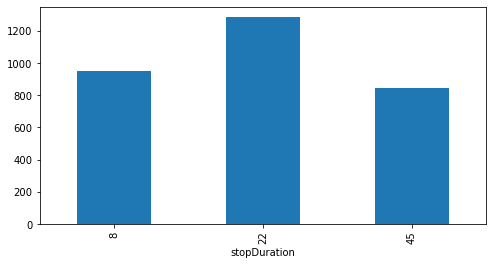

In [70]:
plt.figure(figsize = (8, 4))
arrest_stopD.plot(kind = 'bar')

### People who get stopped for 15 - 30 Mins are likely to get arrested.

In [71]:
# gender vs stop duration
pd.crosstab(df.driver_gender, df.stopDuration, normalize = True)

stopDuration,8,22,45
driver_gender,,,
F,0.230020,0.039648,0.005061
M,0.574004,0.119130,0.032137


### More Male suffer longer stop duration compared to female

In [72]:
pd.crosstab(df.driver_race, df.stopDuration, normalize = 'index')

stopDuration,8,22,45
driver_race,,,
Asian,0.835496,0.140226,0.024278
Black,0.773382,0.173057,0.053561
Hispanic,0.784517,0.164593,0.050889
Other,0.871698,0.109434,0.018868
White,0.811670,0.155956,0.032374


### Blacks and Hispanics suffered longer duration stop compared to other race

In [73]:
pd.crosstab(df.violation, df.stopDuration)

stopDuration,8,22,45
violation,,,
Equipment,9087,1374,460
Moving violation,11799,3132,1293
Other,2551,1227,631
Registration/plates,2627,844,232
Seat belt,2579,250,27
Speeding,40934,6913,576


### Moving violation offenders suffered more 30+ Mins duration stop compared to other offenders

In [74]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stopDuration
stop_datetime,,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,8
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,8
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,8
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,22
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,8


In [75]:
df.drop('stop_duration', axis = 'columns', inplace = True)

In [76]:
df.to_csv('Desktop/Police_cleaned.csv')